# Курс "Прикладные задачи анализа данных"
## Задание № 1 : найти типичные представители датасета, выполнил Сюй Минчуань

### 1. Загрузим необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Импортируем данных датасета и предобработка данных

данные взяты из https://basketball.realgm.com/nba/stats/2021/Averages/Qualified/points/All/desc/1/Regular_Season

**Описание датасета:** в нем собраны индивидуальные статистики игроков НБА в прошлом регулярном чемпионате (2020-2021 Regular Season)

**ЗАДАЧА**: Представим, что генеральный директор НБА или какой-то команды хочет найти типичный игрок, чтобы узнавать о среднем уровне способности игроков для последующего анализа и принятия решений.

Показаны только данные игроков, которые имеют _квалификацию_ при выполнении некоторых специфичных условий:

см. https://basketball.realgm.com/info/glossary.


Квалификация означает, что мы не будем анализировать данные тех игроков, у которых мало числа присутствия мятчов и мало величин статистик. В итоге в датасете содержатся данные 264 игроков.

**Предобработка данных**:

* Удалим ненужные данные атрибутов 'FGM','FGA','3PM','3PA','FTM','FTA', так как нам важны проценты удачных поподаний мяча, которые показывают устойчивость способности игрока, а не сами числа попыток. 
* Также удалим данные атрибутов 'ORB','DRB', так как эти статистики не важны при поиске типичных представителей: RPG уже достаточно. 

**Замечание: Расшифрование аббревиатур столбец можно увидеть в файле "Stats Legend.csv"**

In [2]:
player = pd.read_csv("active_player.csv")
player.drop(['FGM','FGA','3PM','3PA','FTM','FTA','ORB','DRB'],axis=1, inplace=True)
player.head()

,Player,Team,GP,MPG,FG%,3P%,FT%,TOV,PF,RPG,APG,SPG,BPG,PPG
0,Stephen Curry,GSW,63,34.2,0.482,0.421,0.916,3.4,1.9,5.5,5.8,1.2,0.1,32.0
1,Bradley Beal,WAS,60,35.8,0.485,0.349,0.889,3.1,2.3,4.7,4.4,1.1,0.4,31.3
2,Damian Lillard,POR,67,35.8,0.451,0.391,0.928,3.0,1.5,4.2,7.5,0.9,0.3,28.8
3,Joel Embiid,PHI,51,31.1,0.513,0.377,0.859,3.1,2.4,10.6,2.8,1.0,1.4,28.5
4,Giannis Antetokounmpo,MIL,61,33.0,0.569,0.303,0.685,3.4,2.8,11.0,5.9,1.2,1.2,28.1


**Ещё раз про легенду статистик:**
* GP: Game Played, MPG: Minutes Per Game
* FG%: Field Goal Percentage, 3P%: 3-Points Percentage, FT%: Free Throw Percentage
* TOV: Turnovers, PF: Personal Fouls
* RPG: Rebounds Per Game, APG: Assists Per Game, SPG: Steals Per Game, BPG: Blocks Per Game, PPG: Points Per Game

### 3. Провизуализируем данные

Построим диаграммы размаха относительно каждого атрибута:

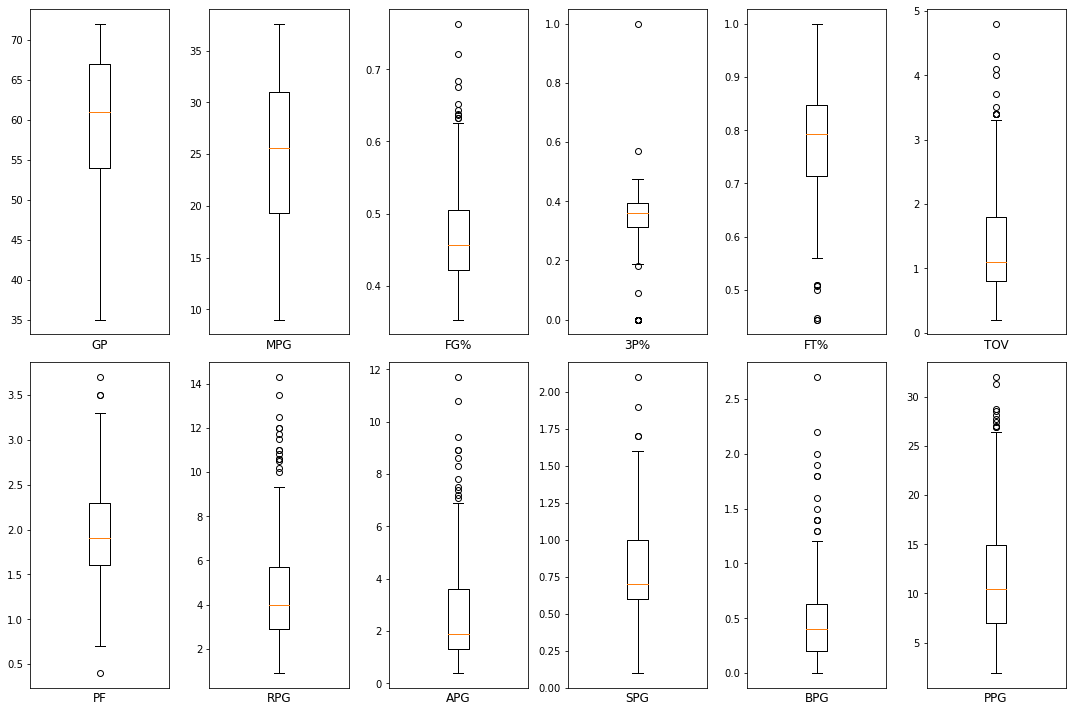

In [3]:
player_data = player.drop(['Player','Team'],axis =1)

fig = plt.figure(figsize=(15,10))
gs = fig.add_gridspec(2,6)

for i in range(0,2):
    for j in range(0,6):
        ax = fig.add_subplot(gs[i,j])
        ax.boxplot(player_data[player_data.columns[i*6+j]])
        ax.set_xlabel(player_data.columns[i*6+j],fontsize = 12)
        plt.xticks([])
fig.tight_layout()

Здесь - гистограммы и распределения для ‘PPG','RPG' и 'APG', которые обычно появляются в анализе маятча

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings

Text(0, 0.5, 'APG')

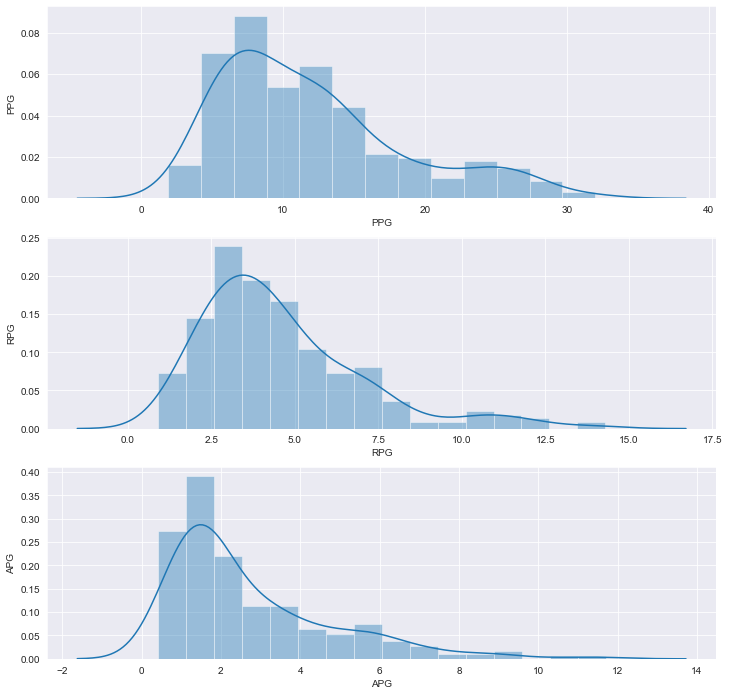

In [4]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,12))

plt.subplot(311)
sns.distplot(player_data['PPG'])
plt.ylabel('PPG')

plt.subplot(312)
sns.distplot(player_data['RPG'])
plt.ylabel('RPG')

plt.subplot(313)
sns.distplot(player_data['APG'])
plt.ylabel('APG')

Здесь показано отношение 'PPG' и 'APG'

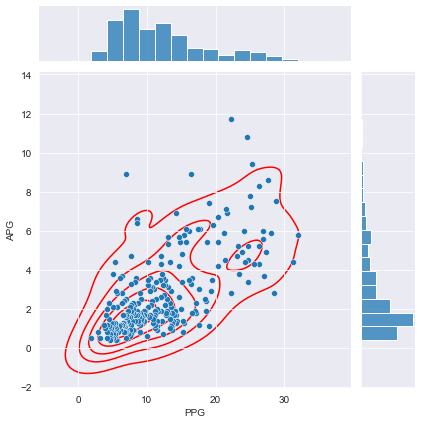

In [5]:
sns.set_style('darkgrid')
g = sns.jointplot(data = player_data, x= "PPG",y = "APG")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)

По пяти статистикам рисуем pairplot

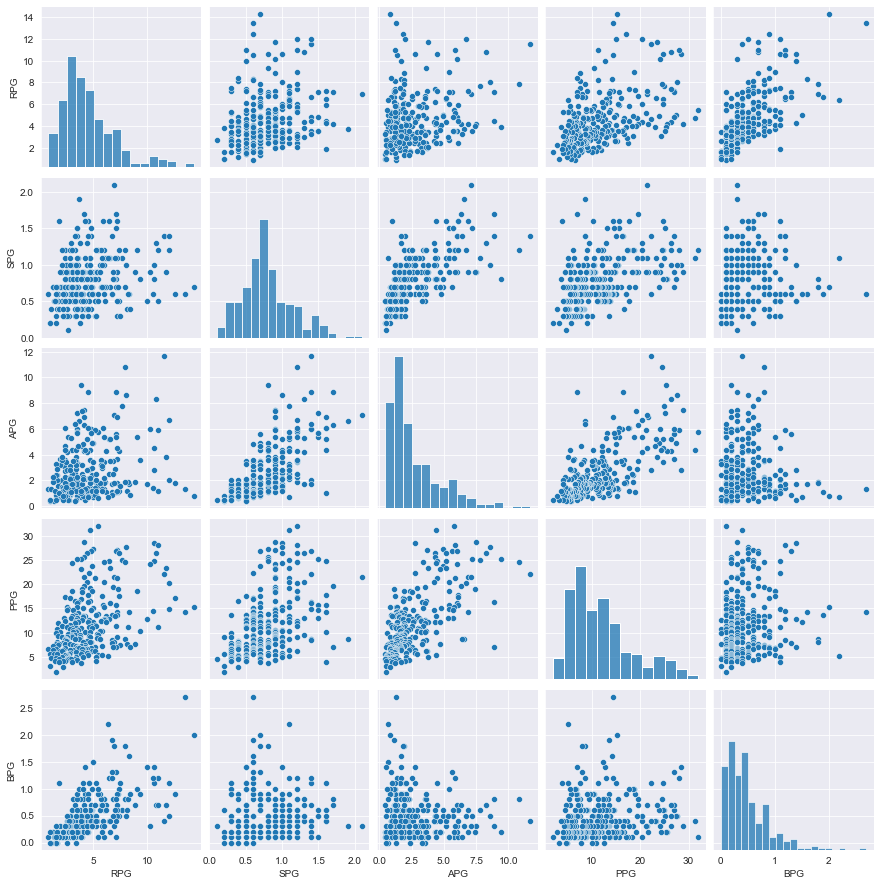

In [6]:
sns.pairplot(data = player_data[['RPG','SPG','APG','PPG','BPG']])

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>

### 4. Среднее как решение оптимизационной задачи

На лекции было рассмотрено понятие среднее как решение оптимизационной задачи вида:
$$ L(a)=\sum^{m}_{i=1} (x_i-a)^2\to\min_{a}$$
Дифференцируя, приравнивая производную функции $L(a)$ к нулю, получаем
$$ \frac{d L}{da} = \sum^{m}_{i=1}2(x_i-a) = 0 \quad \Rightarrow \quad a = \frac{\sum^{m}_{i=1} x_i}{m}$$
Это значит, что значение среднего можно вычислить путем усреднением по всем значениям атрибутов. 


In [7]:
mean_data = player_data.mean()
np.round(mean_data,2)

GP     60.28
MPG    25.14
FG%     0.47
3P%     0.34
FT%     0.78
TOV     1.41
PF      1.97
RPG     4.58
APG     2.72
SPG     0.80
BPG     0.49
PPG    11.99
dtype: float64

### 5. Оценка минимального контраста

Можно рассматривать задачу нахождения медианы в общем случае:

$$ mid(X) = argmin\sum_{i=1}^{m}f(x_i,a)$$

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
Мешалкин Л.Д. в 1977-ом году предлагал $f(x,a) = -\frac{1}{\lambda} exp\left(-\frac{\lambda (x-a)^2}{2}\right)$.В этом случае: $\psi(z)=zexp\left(\frac{-\lambda z^2}{2}\right), \xi(z)=exp\left(\frac{-\lambda z^2}{2}\right)$. 

Формула для итеративного расчета:
$$ a= \frac{\sum_{i=1}^m x_i\xi(x_i-a)}{\sum_{i=1}^m \xi(x_i-a)}$$


In [8]:
def xi_function(x,lam):
    return np.exp(-lam * x * x * 0.5)

def formula_for_next_a(a,lam,data):
    total_1 = 0.0
    total_2 = 0.0
    for i in range(len(data)):
        total_1 += data[i]*xi_function(data[i]-a,lam)
        total_2 += xi_function(data[i]-a,lam)
    return total_1 / total_2

def Meshalkin(init_arr,lam,data,eps):
    next_arr = np.array( [formula_for_next_a(init_arr[i],lam,data[data.columns[i]]) for i in range(data.shape[1])])
    itemidiate_value = np.array([np.linalg.norm(next_arr)])
    while np.linalg.norm(np.array(next_arr - init_arr)) > eps:
        init_arr = next_arr
        next_arr = np.array([formula_for_next_a(init_arr[i],lam,data[data.columns[i]]) for i in range(data.shape[1])])
        itemidiate_value = np.append(itemidiate_value,np.linalg.norm(next_arr))
    return next_arr,itemidiate_value

Функция Meshalkin во входе принимает начальное приближение, значение ламбды, датасет и желаемый точность. Мы стартуем из средней точки, вычисленной выше, при ламбде равной единице, получим окончательный вектор альфа и последовательность норм альфа в ходе итерационного вычисления:

In [9]:
ave_arr,itermidiate = Meshalkin(mean_data,1,player_data,0.01)
print(ave_arr)
print(itermidiate)

[61.23386005 25.22099752  0.47235907  0.3376054   0.77611704  1.16994193
  1.9465734   3.5018354   1.60797834  0.78170123  0.44454199 12.58408457]
[66.77614347 66.87287936 66.96132119 67.03926292 67.10679464 67.16505863
 67.21544737 67.25925741 67.29758604 67.3313274  67.36120101 67.38778578
 67.41155053 67.43287864 67.45208715 67.46944127 67.48516527 67.49945073
 67.51246269 67.52434443 67.53522109 67.54520253 67.55438554 67.56285573
 67.57068897]


Как не странно, окончательный вектор альфа близко к среднему, что вполне логично выводится. Тестируем на разных лямбдах

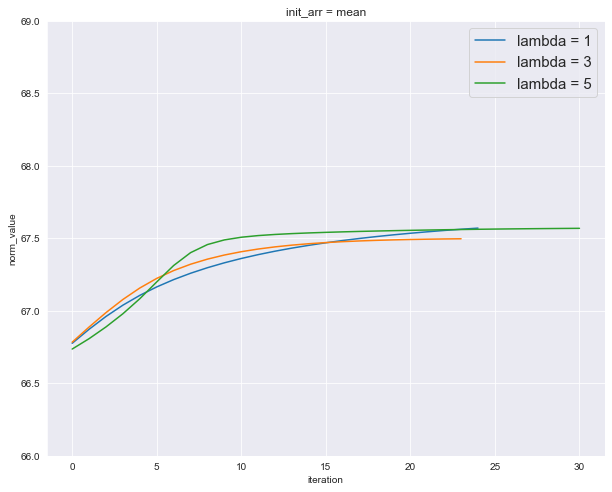

In [10]:
# lambda = 1,3,5, init_arr = mean
plt.figure(figsize=(10,8))
arr,itermidiate = Meshalkin(mean_data,1,player_data,0.01)
plt.plot(itermidiate,label = 'lambda = 1')
arr,itermidiate = Meshalkin(mean_data,3,player_data,0.01)
plt.plot(itermidiate,label = 'lambda = 3')
arr,itermidiate = Meshalkin(mean_data,5,player_data,0.01)
plt.plot(itermidiate,label = 'lambda = 5')
plt.ylim(66,69)
plt.xlabel("iteration")
plt.ylabel("norm_value")
plt.title("init_arr = mean")
plt.legend(fontsize = 15)
plt.show()

### 6. Попробуем другое способ оценивания
В этом разделе мы попробуем использовать другое способ определения среднего игрока: 

1. Находим экстремумы по основным атрибутам (атриб. от 'GP' до 'PPG'), 
    * По атрибутам 'TOV' и 'PF' находим и минимумы, и максимумы
    * По всем остальным атрибутам находим максимумы  
2. Припишем для каждого игрока _скоринг_ в зависимости от экстремумов.
    * Например, если максимум по 'PPG' = 32.0, то скоринг игрока с 'PPG=20.0'по 'PPG' будет 20.0/32.0=0.625. В таком формате приписать скоринг для всех основных атрибутов
    * если минимум по 'TOV' = 0.2, максимум = 4.8, то скоринг игрока с 'TOV=3' по 'TOV' будет 1-(3-0.2)/(4.8-0.2) = 0.39
    
3. Просуммируем для каждого игрока скорингы всех атрибуты, получаем _итоговую оценку_ игрока, и просортируем по итоговой оценке. 
4. Найдем медиану итоговых оценок, и тот игрок, у которого оценка ближайжая к медиане, будет типичный игрок.

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>
Формула для расчета: ИТОГ_СКОРИНГ = $\sum_{атриб.} скоринг\,\,атриб. $


**Давайте это сделаем:**
1. Покажем экстремумы соответствующих атрибутов:

In [11]:
min_and_max = player.describe().loc[['min','max']]
min_and_max

,GP,MPG,FG%,3P%,FT%,TOV,PF,RPG,APG,SPG,BPG,PPG
min,35.0,9.0,0.353,0.0,0.444,0.2,0.4,0.9,0.4,0.1,0.0,1.9
max,72.0,37.6,0.763,1.0,1.000,4.8,3.7,14.3,11.7,2.1,2.7,32.0


2. Зачем вычислим скоринги для всех игроков

In [12]:
player_score = pd.DataFrame.copy(player, deep=True)
for i in range(player.shape[0]):
    for attri in range(2,player.shape[1]):
        if attri == 7 or attri == 8 :
            player_score.iloc[i,attri] = 1.0 - (player.iloc[i,attri]-min_and_max.iloc[0,attri-2])/(min_and_max.iloc[1,attri-2]-min_and_max.iloc[0,attri-2])
        else:
            player_score.iloc[i,attri] = player.iloc[i,attri]/min_and_max.iloc[1,attri-2]
player_score.head(5)

,Player,Team,GP,MPG,FG%,3P%,FT%,TOV,PF,RPG,APG,SPG,BPG,PPG
0,Stephen Curry,GSW,0.875000,0.909574,0.631717,0.421,0.916,0.304348,0.545455,0.384615,0.495726,0.571429,0.037037,1.000000
1,Bradley Beal,WAS,0.833333,0.952128,0.635649,0.349,0.889,0.369565,0.424242,0.328671,0.376068,0.523810,0.148148,0.978125
2,Damian Lillard,POR,0.930556,0.952128,0.591088,0.391,0.928,0.391304,0.666667,0.293706,0.641026,0.428571,0.111111,0.900000
3,Joel Embiid,PHI,0.708333,0.827128,0.672346,0.377,0.859,0.369565,0.393939,0.741259,0.239316,0.476190,0.518519,0.890625
4,Giannis Antetokounmpo,MIL,0.847222,0.877660,0.745740,0.303,0.685,0.304348,0.272727,0.769231,0.504274,0.571429,0.444444,0.878125


3. Вычислим итоговые оценки:

In [13]:
def part_sum(row):
    s=0
    for i in range(2,len(row)):
        s += row[i]
    return s
player_score['Total'] = player_score.apply(part_sum, axis=1 )
player_score.head(5)

,Player,Team,GP,MPG,FG%,3P%,FT%,TOV,PF,RPG,APG,SPG,BPG,PPG,Total
0,Stephen Curry,GSW,0.875000,0.909574,0.631717,0.421,0.916,0.304348,0.545455,0.384615,0.495726,0.571429,0.037037,1.000000,7.091901
1,Bradley Beal,WAS,0.833333,0.952128,0.635649,0.349,0.889,0.369565,0.424242,0.328671,0.376068,0.523810,0.148148,0.978125,6.807740
2,Damian Lillard,POR,0.930556,0.952128,0.591088,0.391,0.928,0.391304,0.666667,0.293706,0.641026,0.428571,0.111111,0.900000,7.225157
3,Joel Embiid,PHI,0.708333,0.827128,0.672346,0.377,0.859,0.369565,0.393939,0.741259,0.239316,0.476190,0.518519,0.890625,7.073221
4,Giannis Antetokounmpo,MIL,0.847222,0.877660,0.745740,0.303,0.685,0.304348,0.272727,0.769231,0.504274,0.571429,0.444444,0.878125,7.203200


4. Сортируем по Total, затем него берем медиане по Total и находим ближайжая к ней игрока:

In [14]:
player_score.sort_values(by='Total',ascending = False).iloc[[132,133]]

,Player,Team,GP,MPG,FG%,3P%,FT%,TOV,PF,RPG,APG,SPG,BPG,PPG,Total
128,Patty Mills,SAS,0.944444,0.659574,0.539974,0.375,0.910,0.826087,0.757576,0.118881,0.205128,0.285714,0.000000,0.337500,5.959879
176,Isaiah Stewart II,DET,0.944444,0.569149,0.724771,0.333,0.696,0.826087,0.303030,0.468531,0.076923,0.285714,0.481481,0.246875,5.956007


In [15]:
method_3_arr = player[player['Player']== 'Patty Mills']
method_3_arr

,Player,Team,GP,MPG,FG%,3P%,FT%,TOV,PF,RPG,APG,SPG,BPG,PPG
128,Patty Mills,SAS,68,24.8,0.412,0.375,0.91,1.0,1.2,1.7,2.4,0.6,0.0,10.8


Игрок Patty Mills - среднее по нашему способу оценивания. 

### 7. Проанализируем и подведем итоги

Давайте изобразить на plt.bar все типичные игроки, которых получили выше:

In [16]:
print(type(mean_data),type(ave_arr),type(method_3_arr))
mean_data = np.array(mean_data)
method_3_arr = np.delete(method_3_arr.values,[0,1])

<class 'pandas.core.series.Series'> <class 'numpy.ndarray'> <class 'pandas.core.frame.DataFrame'>


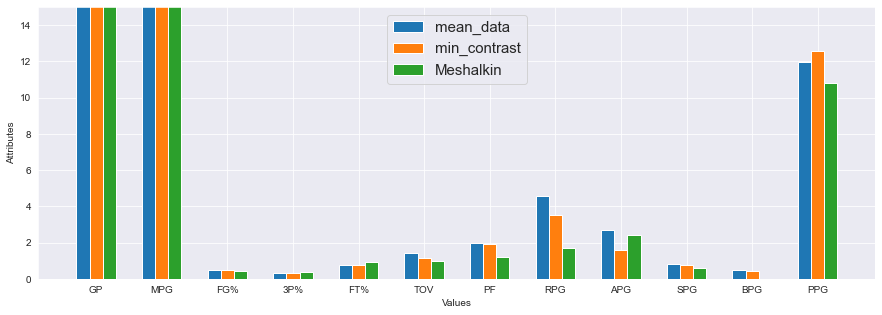

In [17]:
xticks = np.arange(player_data.shape[1])
bar_width = 0.2

plt.figure(figsize=(15,5))
plt.ylim(0,15)
plt.bar(xticks-bar_width, mean_data, width = bar_width,label = 'mean_data')
plt.bar(xticks, ave_arr, width = bar_width,label = 'min_contrast')
plt.bar(xticks+bar_width, method_3_arr, width = bar_width,label = 'Meshalkin')
plt.xticks(xticks,player_data.columns)
plt.ylabel("Attributes")
plt.xlabel("Values")
plt.legend(fontsize = 15)
plt.show()

Тут видно, что из трех подхода получили похожие результаты. Но это может быть немножко не совпадать с реальной зарплатой у игрока... Мы добавим данные зарплат всех иогроков. Давайте изобразить scatter по зарплатой и итоговой оценкой:

Данные зарплаты взяты из https://hoopshype.com/salaries/players/2020-2021/

Text(6.9, 42000000, 'Kevin Durant')

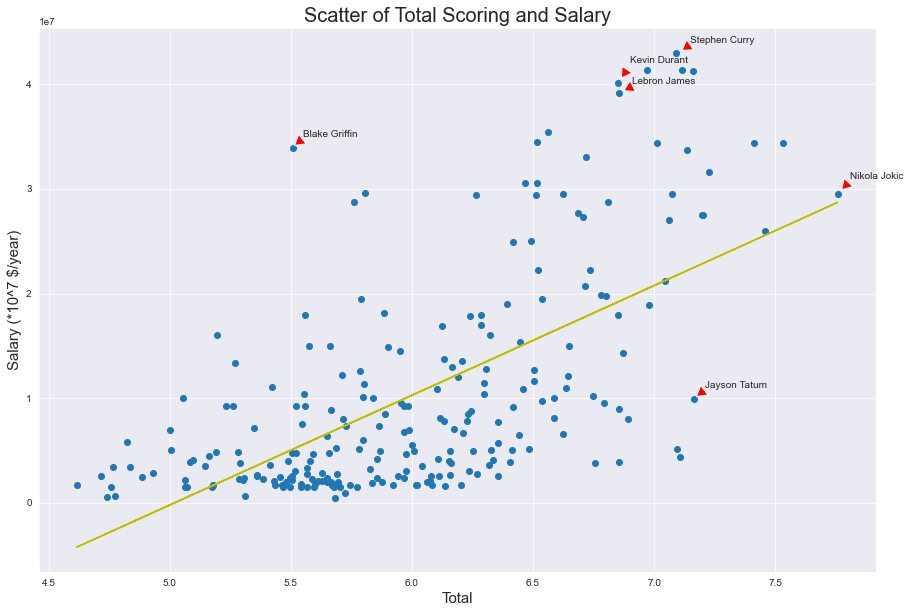

In [18]:
salary = pd.read_csv("salary.csv")
new_data = pd.merge(player_score[['Player','Total']],salary)
data_total = new_data['Total']
data_salary = new_data['2020/21']

plt.figure(figsize=(15,10))
plt.scatter(data_total,data_salary)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(data_total.values.reshape(data_total.shape[0],1),data_salary)
predict = model.predict(data_total.values.reshape(data_total.shape[0],1))

plt.plot(data_total,predict,color = 'y')
plt.xlabel('Total',size = 15)
plt.title("Scatter of Total Scoring and Salary",size = 20)
plt.ylabel('Salary (*10^7 $/year)',size = 15)

plt.annotate("Stephen Curry",xy = (7.10,43000000), xytext =(7.15,44000000),
             arrowprops={"headlength":10,"shrink":0.3,"facecolor":"r"} )
plt.annotate("Blake Griffin",xy = (5.5,33900000), xytext =(5.55,35000000),
             arrowprops={"headlength":10,"shrink":0.3,"facecolor":"r"} )
plt.annotate("Nikola Jokic",xy = (7.76,29540000), xytext =(7.81,31000000),
             arrowprops={"headlength":10,"shrink":0.3,"facecolor":"r"} )
plt.annotate("Jayson Tatum",xy = (7.16,9900000), xytext =(7.21,11000000),
             arrowprops={"headlength":10,"shrink":0.3,"facecolor":"r"} )
plt.annotate("Lebron James",xy = (6.86,39220000), xytext =(6.91,40000000),
             arrowprops={"headlength":10,"shrink":0.3,"facecolor":"r"} )
plt.annotate("Kevin Durant",xy = (6.85,40110000), xytext =(6.90,42000000),
             arrowprops={"headlength":10,"shrink":0.3,"facecolor":"r"} )

Можно увидеть, что итоговая оценка в общем соответствует зарплате, то есть игрок с высокой оценкой получает высокую зарплату. Но все-таки есть игроки, у которых отсутствие ожидаемой способности по своей зарплате.

Понятно, что можно использовать весовую схему, приписав для каждых атрибутов веса, затем сопоставить зарплаты игроки и итоговые оценки, используя какую-то регрессионную модель (улучшить корреляцию этих двух величины). Зарплата может показывать реальную оценку генеральных директоров к игрокам. (деньги сами все скажут :) ). Но это пока решу сделать чуть-позже из-за нехватки времени...